In [1]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pathlib import Path
from fastai.vision.all import *

In [2]:
# Set data path
path = 'Monkeypox Skin Image Dataset'

np.random.seed(40)
# Create an ImageDataLoaders object
data = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2,
                                   item_tfms=Resize(460),
                                   batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

C:\Users\HP\anaconda3\lib\site-packages\fastai\data\transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):


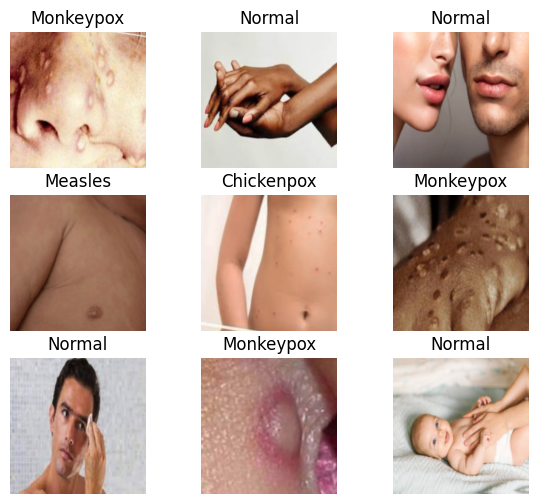

In [3]:
data.show_batch(figsize=(7, 6))
#data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)

None


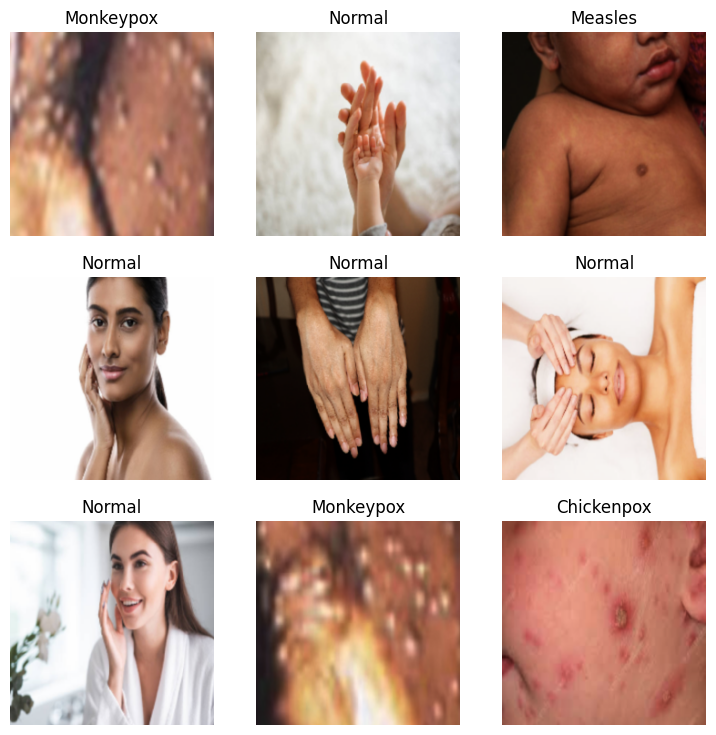

In [4]:
print(data.show_batch())


In [5]:
data

In [6]:
# Access classes using .vocab
classes = data.vocab
print(classes)

# Get the number of classes
num_classes = len(classes)
print(num_classes)


['Chickenpox', 'Measles', 'Monkeypox', 'Normal']
4


In [7]:
learn = vision_learner(data, models.resnet18, metrics=[accuracy], model_dir=Path('Monkeypox Skin Image Dataset'), path=Path("."))

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
# Define custom data augmentation transforms
custom_tfms = [
    RandomResizedCrop(size=224, min_scale=0.5),
    Flip(),
    Rotate(max_deg=30),
    Brightness(max_lighting=0.2),
    Contrast(max_lighting=0.2),
    Normalize.from_stats(*imagenet_stats)
]

data = ImageDataLoaders.from_folder("Monkeypox Skin Image Dataset", train='.', valid_pct=0.2, 
                                   item_tfms=Resize(460), batch_tfms=custom_tfms, 
                                   num_workers=4)

AttributeError: 'Sequential' object has no attribute 'plot'

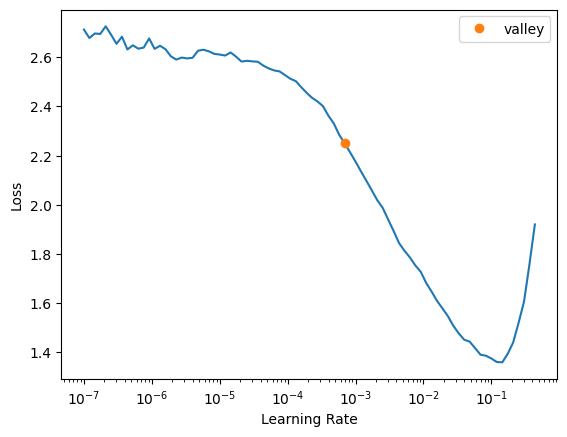

In [57]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

In [ ]:
###offers a high-level API for PyTorch

In [9]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(40, slice(lr1, lr2))


epoch,train_loss,valid_loss,accuracy,time
0,1.314093,1.700241,0.727273,02:03
1,0.838068,0.890880,0.844156,01:45
2,0.640762,0.933000,0.889610,01:44
3,0.573352,0.825290,0.863636,01:42
4,0.534154,1.163771,0.889610,01:42
5,0.538711,2.394188,0.811688,01:44
6,0.619897,3.008693,0.818182,01:44
7,0.754248,3.518866,0.759740,01:45
8,0.837601,3.153934,0.766234,01:44
9,0.969474,2.289584,0.870130,01:43


In [ ]:
###unfreezes the layers of the pre-trained CNN model and then continues training it for 20 epochs with a dynamic learning rate schedule

In [10]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.086763,1.780926,0.909091,01:49
1,0.089745,2.091611,0.909091,01:57
2,0.115638,2.745547,0.876623,01:51
3,0.272955,2.387116,0.850649,01:51
4,0.429691,6.308709,0.824675,01:54
5,0.530197,3.168786,0.818182,01:54
6,0.530889,3.742346,0.837662,01:48
7,0.487850,3.593248,0.831169,01:49
8,0.447263,1.628275,0.889610,01:56
9,0.397096,2.436729,0.863636,01:54


In [68]:
#learn.recorder.plot_losses()

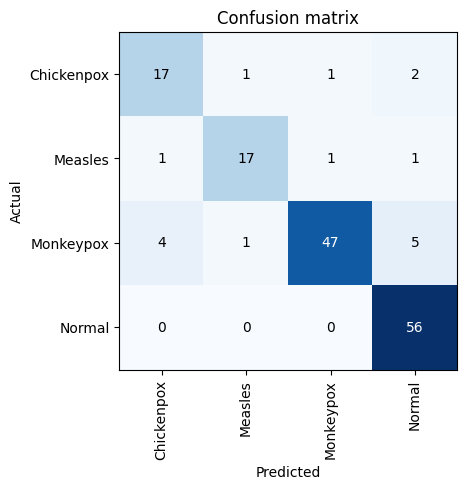

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
####  useful for debugging and gaining insights into why the model might be making errors

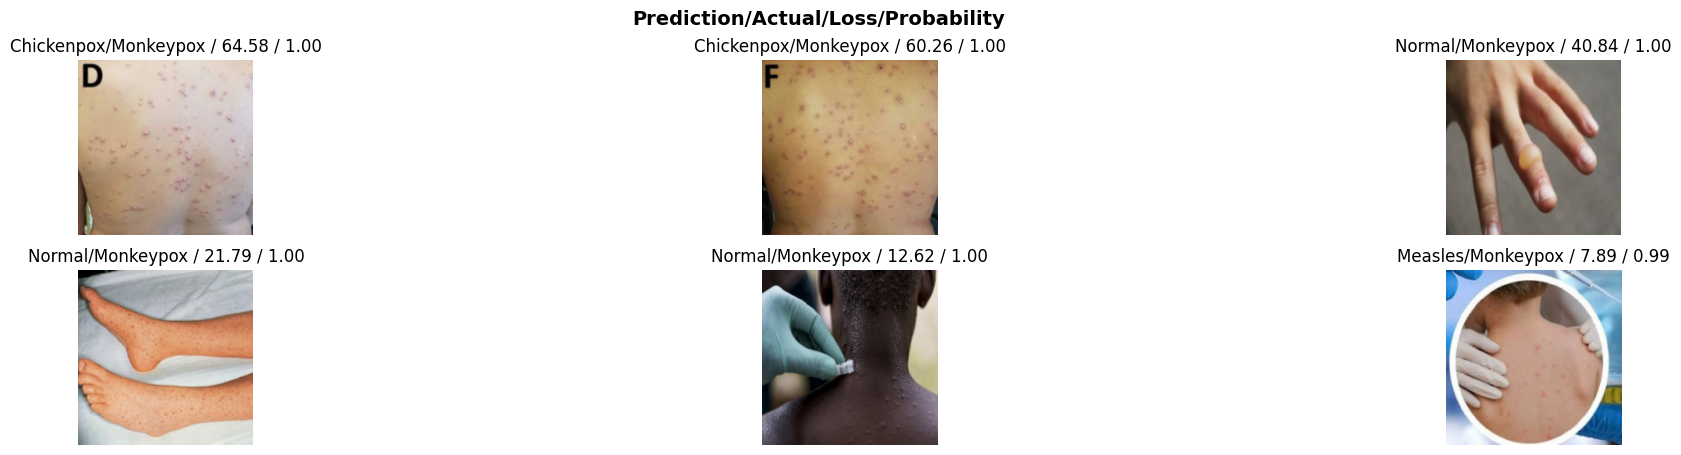

In [12]:
interp.plot_top_losses(6,figsize = (25,5))

In [65]:
pwd

'E:\\4th Year\\2nd Sem\\DL\\project\\Skin diseases\\dataset'

In [13]:
from fastai.vision.all import *

# Load the trained model (if not already loaded)
# learn = load_learner("path_to_your_model.pkl")

# Replace 'your_image_path.jpg' with the path to your image file
img_path = 'test.png'

# Load the image using PIL
img = PILImage.create(img_path)

# Make predictions on the image
prediction = learn.predict(img)
print(prediction[0])


Monkeypox
